<a href="https://colab.research.google.com/github/VardanDavtyan/ML-DL/blob/main/SalaryDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA

# Salary Clustering

In [3]:
df = pd.read_csv('Salary_Data_2022_REV15.csv')
people_data = df[['Age.Range', 'Years.of.Experience', 'Industry', 'Job.Title', 'Education', 'Location', 'Country', 'Salary']]
people_data = people_data.dropna()
people_data

,Age.Range,Years.of.Experience,Industry,Job.Title,Education,Location,Country,Salary
0,18-21,3.0,GAMING,STREAMER,None,LOS ANGELES CA,US,490000
1,30-33,5.0,HEALTHCARE,AESTHETIC NURSE PRACTITIONER/BUSINESS OWNER,Master's Degree,WINNIPEG,CANADA,490000
2,18-21,1.0,ONLINE ARCADE,OWNER,High School/GED,SAN DIEGO,US,480000
3,18-21,2.0,CRYPTO,HEAD OF MARKETING,Some College,"TAMPA, FL",US,480000
4,34-37,13.0,WINDOW COVERINGS,OWNER,Bachelor's Degree,"CHARLOTTE, NC",US,480000
...,...,...,...,...,...,...,...,...
32565,30-33,9.0,BEAUTY,SOCIAL MEDIA DIRECTOR,Bachelor's Degree,"LOS ANGELES, CA",US,0
32566,34-37,14.0,RETAIL,SENIOR MANAGER,Master's Degree,MUMBAI,INDIA,0
32567,30-33,5.0,TECHNOLOGY,MARKETING MANAGER,Master's Degree,LONDON,UK,0
32568,26-29,4.0,MATERIAL HANDLING,SOLUTIONS CONSULTANT,Bachelor's Degree,"GRAND RAPIDS, MI",US,110000


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_data = people_data.copy()
encoded_data['Age.Range'] = label_encoder.fit_transform(people_data['Age.Range'])
encoded_data['Industry'] = label_encoder.fit_transform(people_data['Industry'])
encoded_data['Job.Title'] = label_encoder.fit_transform(people_data['Job.Title'])
encoded_data['Education'] = label_encoder.fit_transform(people_data['Education'])
encoded_data['Location'] = label_encoder.fit_transform(people_data['Location'])
encoded_data['Country'] = label_encoder.fit_transform(people_data['Country'])

encoded_data

,Age.Range,Years.of.Experience,Industry,Job.Title,Education,Location,Country,Salary
0,0,3.0,2174,11277,5,1574,51,490000
1,3,5.0,2431,391,4,3406,8,490000
2,0,1.0,3820,7543,3,2662,51,480000
3,0,2.0,1168,5142,6,3074,51,480000
4,4,13.0,5593,7543,1,566,51,480000
...,...,...,...,...,...,...,...,...
32565,3,9.0,480,10537,1,1581,51,0
32566,4,14.0,4483,10044,4,1899,23,0
32567,3,5.0,5239,6786,4,1532,49,0
32568,2,4.0,3304,10687,1,1125,51,110000


In [6]:
NC = 20
test_count = 10000
model = AgglomerativeClustering(n_clusters=NC, linkage="ward")
model.fit(encoded_data.values)
data_pr = model.fit_predict(encoded_data.values[:test_count])
data_pr

array([1, 1, 1, ..., 9, 9, 9])

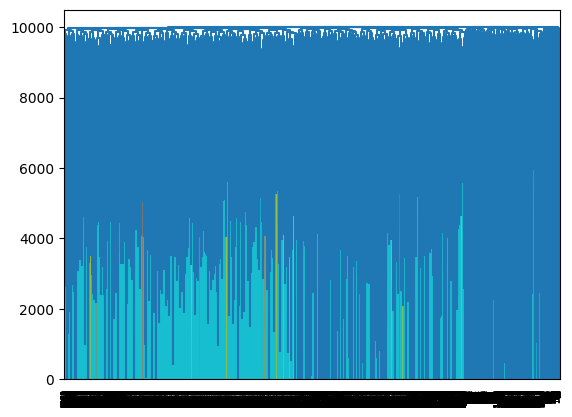

<Figure size 1000x600 with 0 Axes>

In [7]:
def plot_dendrogram(model, **kwargs):
    children = model.children_
    distance = np.arange(children.shape[0])
    no_of_observations = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

f, ax = plt.subplots(1, 1)
plt.figure(figsize=(10,6))
plot_dendrogram(model, ax=ax)
plt.show()

In [8]:
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(encoded_data.values[:test_count])
data_reduced

array([[366238.65973632,  -4190.82741902],
       [366236.54844686,   6635.86285593],
       [356242.85403213,   -600.0632635 ],
       ...,
       [-38758.42763019,   2252.10549397],
       [-38757.34139385,  -3865.94845307],
       [-38755.898107  ,  -2914.45812832]])

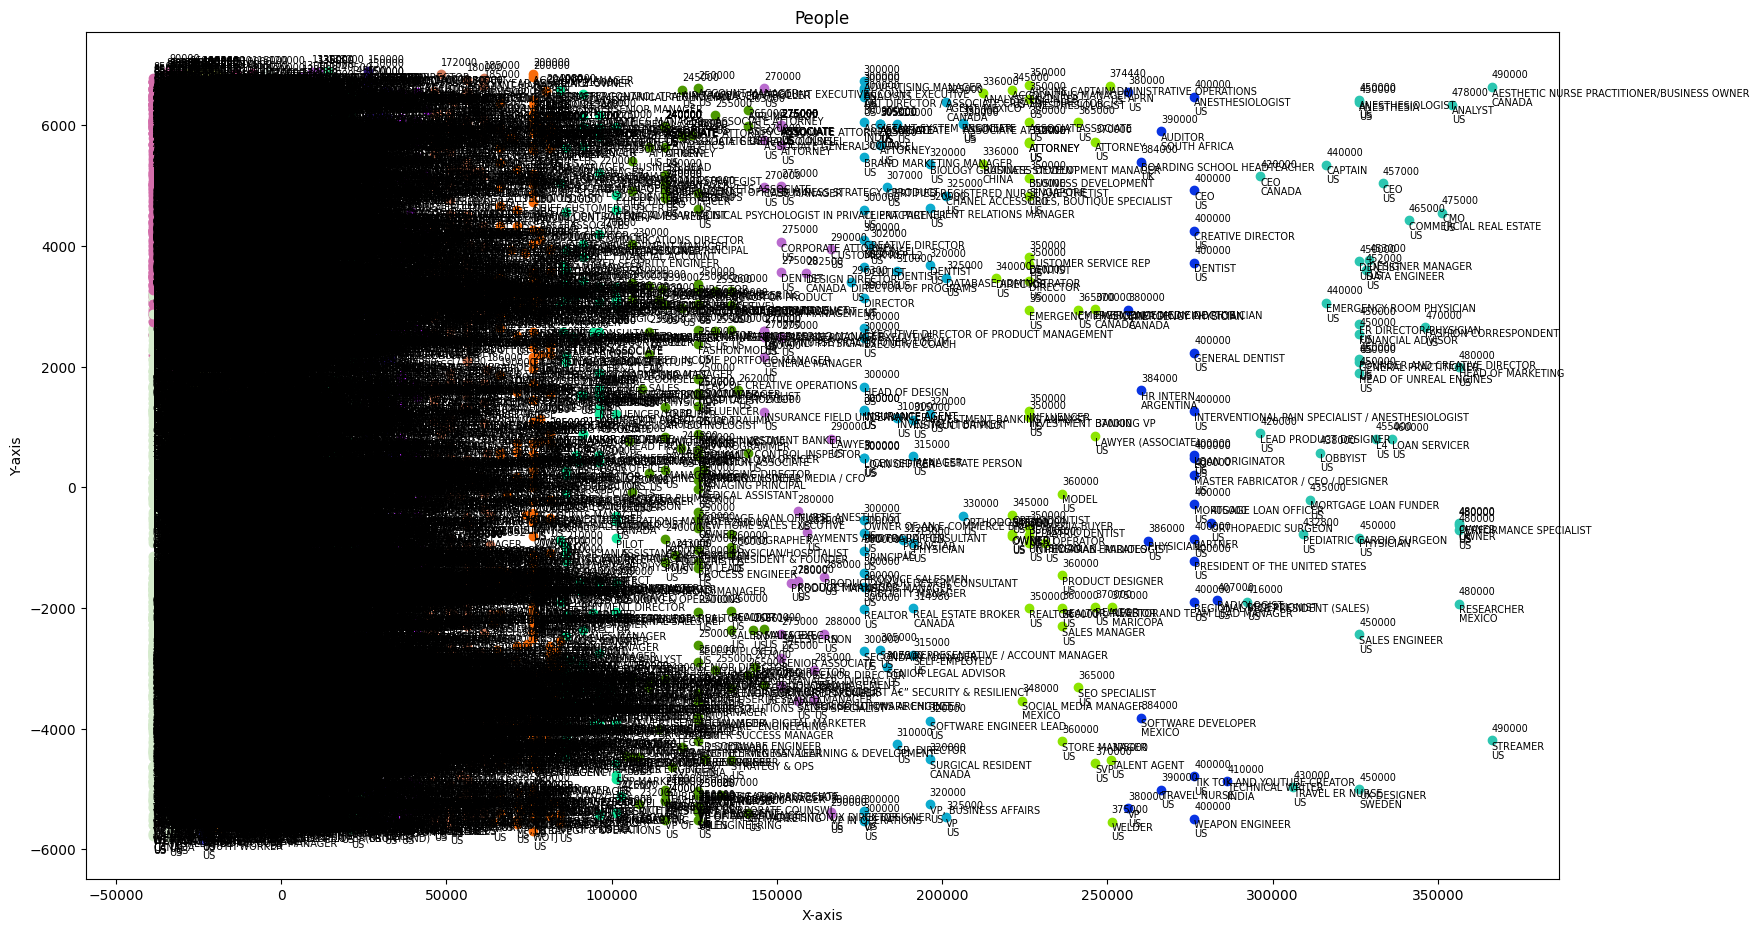

In [9]:

import random

def random_color():
    """Generate a random color code."""
    return '#{:02X}{:02X}{:02X}'.format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

colors = [random_color() for _ in range(NC)]

plt.figure(figsize=(19, 11))
for i in range(data_reduced.shape[0]):
  plt.scatter(data_reduced[i, 0], data_reduced[i, 1], c=colors[data_pr[i]])
  plt.text(data_reduced[i, 0], data_reduced[i, 1] + 150, people_data.iloc[i, 7], fontsize=7)
  #plt.text(data_reduced[i, 0], data_reduced[i, 1] , people_data.iloc[i, 0], fontsize=7)
  plt.text(data_reduced[i, 0], data_reduced[i, 1] - 150, people_data.iloc[i, 3], fontsize=7)
  plt.text(data_reduced[i, 0], data_reduced[i, 1] - 300, people_data.iloc[i, 6], fontsize=7)
plt.title("People")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

# Salary Predicting

In [10]:
df = pd.read_csv('Salary_Data_2022_REV15.csv')
people_data = df[['Age.Range', 'Years.of.Experience', 'Industry', 'Job.Title', 'Education', 'Location', 'Country', 'Salary']]
people_data = people_data.dropna()
salary = np.array(people_data["Salary"])
people_data = people_data.drop(columns=["Salary"])
print(people_data.shape, salary.shape)

(31166, 7) (31166,)


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_data = people_data.copy()
encoded_data['Age.Range'] = label_encoder.fit_transform(people_data['Age.Range'])
encoded_data['Industry'] = label_encoder.fit_transform(people_data['Industry'])
encoded_data['Job.Title'] = label_encoder.fit_transform(people_data['Job.Title'])
encoded_data['Education'] = label_encoder.fit_transform(people_data['Education'])
encoded_data['Location'] = label_encoder.fit_transform(people_data['Location'])
encoded_data['Country'] = label_encoder.fit_transform(people_data['Country'])

encoded_data

,Age.Range,Years.of.Experience,Industry,Job.Title,Education,Location,Country
0,0,3.0,2174,11277,5,1574,51
1,3,5.0,2431,391,4,3406,8
2,0,1.0,3820,7543,3,2662,51
3,0,2.0,1168,5142,6,3074,51
4,4,13.0,5593,7543,1,566,51
...,...,...,...,...,...,...,...
32565,3,9.0,480,10537,1,1581,51
32566,4,14.0,4483,10044,4,1899,23
32567,3,5.0,5239,6786,4,1532,49
32568,2,4.0,3304,10687,1,1125,51


In [12]:
encoded_data.drop(columns=['Industry', 'Location'],  axis=1, inplace=True)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(np.array(encoded_data), np.array(salary), test_size=0.2)

# Create a logistic regression model
clf = DecisionTreeRegressor(max_depth=50, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Check accuracy
mse = np.square(np.subtract(y_test, y_pred)).mean()
print(f"Loss: {mse:.2f}")

Loss: 2603805742.80


In [14]:
import tensorflow  as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Embedding, Flatten, Dropout, BatchNormalization, concatenate
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [17]:
X_train, X_test, y_train, y_test = train_test_split(np.array(encoded_data), np.array(salary), test_size=0.2)


model = Sequential()
model.add(Flatten(input_shape=(5,)))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 5)                 0         
                                                                 
 dense_3 (Dense)             (None, 128)               768       
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9089 (35.50 KB)
Trainable params: 9089 (

In [18]:
#X_train = np.expand_dims(X_train, axis=0)
#print(X_train.shape)
model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer=Adam(0.001))
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2)

Epoch 1/50
624/624 [==============================] - 3s 3ms/step - loss: 3587957248.0000 - accuracy: 0.0000e+00 - val_loss: 3238493952.0000 - val_accuracy: 0.0000e+00
Epoch 2/50
624/624 [==============================] - 2s 3ms/step - loss: 2863257088.0000 - accuracy: 0.0000e+00 - val_loss: 2580187136.0000 - val_accuracy: 0.0000e+00
Epoch 3/50
624/624 [==============================] - 2s 4ms/step - loss: 2158279680.0000 - accuracy: 0.0000e+00 - val_loss: 2220278784.0000 - val_accuracy: 0.0000e+00
Epoch 4/50
624/624 [==============================] - 2s 4ms/step - loss: 1990168320.0000 - accuracy: 0.0000e+00 - val_loss: 2067488640.0000 - val_accuracy: 0.0000e+00
Epoch 5/50
624/624 [==============================] - 2s 3ms/step - loss: 1976209024.0000 - accuracy: 0.0000e+00 - val_loss: 2028523776.0000 - val_accuracy: 0.0000e+00
Epoch 6/50
624/624 [==============================] - 2s 3ms/step - loss: 1949490048.0000 - accuracy: 0.0000e+00 - val_loss: 2017033216.0000 - val_accuracy: 0.0

KeyboardInterrupt: 

In [19]:
y_pred = model.predict(X_test)
((y_test - y_pred)**2).mean()

195/195 [==============================] - 0s 1ms/step


2389438871.819636